In [56]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/Anonymize_Loan_Default_data.csv", encoding='unicode_escape')

In [58]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [59]:
#Summary for Numerical Values
df.select_dtypes(['float64']).describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,38479.000000,38479.000000,14117.000000,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000
mean,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,0.151927,1.083942,35.009846,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757
std,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,0.507592,1.534814,22.426843,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000
50%,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,0.000000,1.000000,33.000000,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000
75%,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,0.000000,2.000000,51.000000,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000
max,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,11.000000,33.000000,120.000000,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000


In [60]:
#Removing variable where creating dummy variables would become unmanageable 
df = df.drop(["id", "member_id","last_pymnt_d", "next_pymnt_d", "last_credit_pull_d", "zip_code", "verification_status", "issue_d", "earliest_cr_line", "revol_util", "addr_state"], axis=1)

#Reassigning select variables to object type 
df['repay_fail'] = df['repay_fail'].astype(object)



In [61]:
df.dtypes

Unnamed: 0                  int64
loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
emp_length                 object
home_ownership             object
annual_inc                float64
loan_status                object
purpose                    object
dti                       float64
delinq_2yrs               float64
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
total_acc                 float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
last_pymnt_amnt           float64
repay_fail                 object
dtype: object

In [62]:
#Standardize using Min-Max for Numerical Values 
scaler = preprocessing.MinMaxScaler()

df_num = df.select_dtypes(['float64'])

num_stand = scaler.fit_transform(df_num)

df_num2 = pd.DataFrame(num_stand, columns=df_num.columns)


<Axes: >

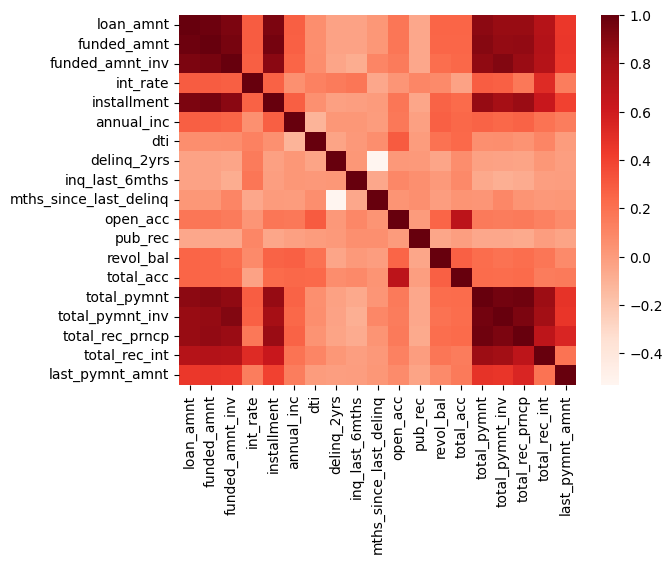

In [63]:

#plotting correlation matrix 
sns.heatmap(df_num2.corr(), cmap="Reds", annot=False)

<Axes: xlabel='loan_amnt', ylabel='total_pymnt'>

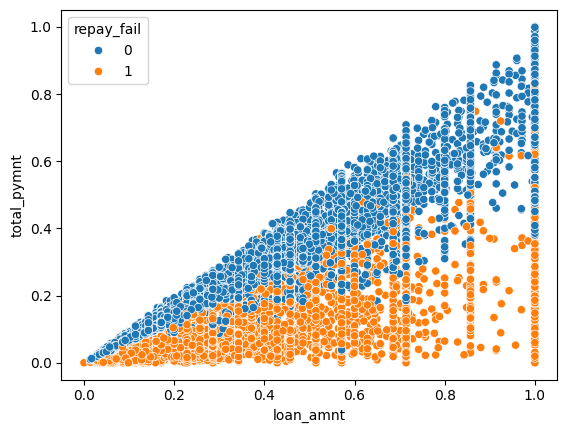

In [64]:
#Select Scatter Plots for Numerical Variables 



df_num3 = df_num2
df_num3["repay_fail"] = df["repay_fail"]

sns.scatterplot(x='loan_amnt', y='total_pymnt', hue="repay_fail", data=df_num3)
#plt.title('Sepal Length vs. Sepal Width')



<Axes: xlabel='funded_amnt', ylabel='total_pymnt_inv'>

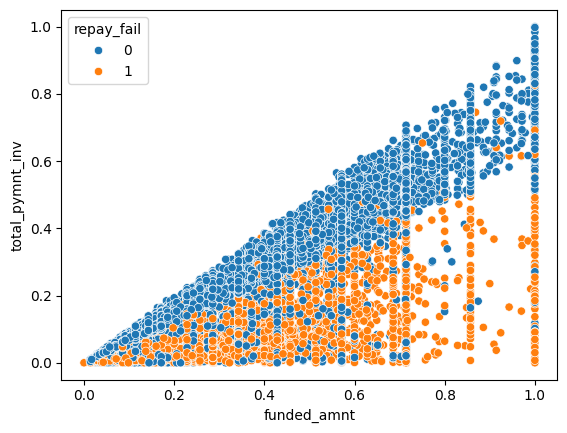

In [65]:
sns.scatterplot(x='funded_amnt', y='total_pymnt_inv', hue="repay_fail", data=df_num3)

<Axes: xlabel='funded_amnt_inv', ylabel='total_rec_int'>

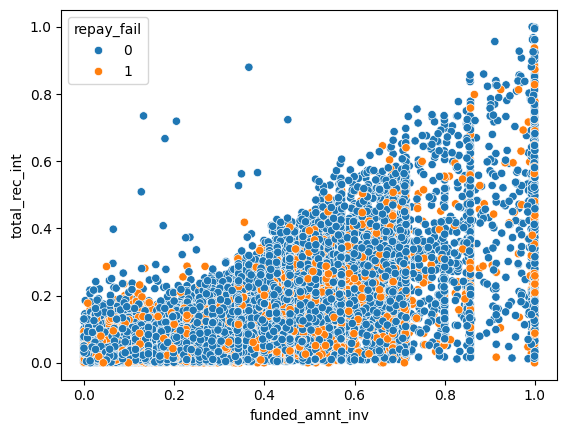

In [66]:
sns.scatterplot(x='funded_amnt_inv', y='total_rec_int', hue="repay_fail", data=df_num3)

<Axes: xlabel='installment', ylabel='last_pymnt_amnt'>

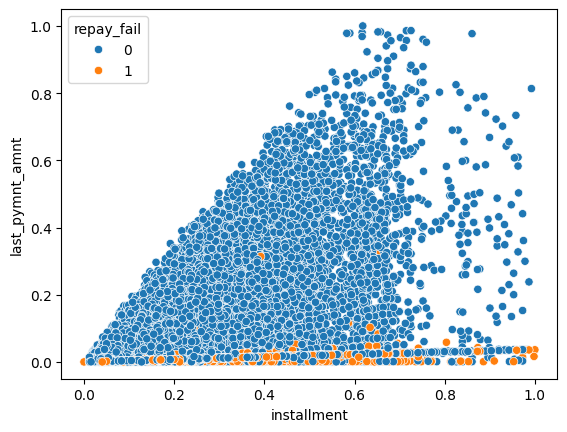

In [67]:
sns.scatterplot(x='installment', y='last_pymnt_amnt', hue="repay_fail", data=df_num3)

In [68]:
#convert object columns to category type 
df_cat = df.select_dtypes(include=['object']).astype('category')
df_cat.head()


,term,emp_length,home_ownership,loan_status,purpose,repay_fail
0,36 months,< 1 year,RENT,Charged Off,major_purchase,1
1,36 months,4 years,RENT,Does not meet the credit policy. Status:Fully ...,other,0
2,36 months,4 years,RENT,Charged Off,debt_consolidation,1
3,36 months,10+ years,MORTGAGE,Fully Paid,other,0
4,36 months,10+ years,RENT,Fully Paid,debt_consolidation,0


In [69]:
#Encode category columns 

columns_to_encode = ["term","emp_length","home_ownership","loan_status","purpose"]

df_cat_dum = df_cat

df_cat_dum = df_cat_dum.drop(["repay_fail"], axis=1)

# Loop through columns and encode using LabelEncoder
for column in columns_to_encode:
    label_encoder = LabelEncoder()
    df_cat_dum[column] = label_encoder.fit_transform(df_cat[column])

df_cat_dum.head

<bound method NDFrame.head of        term  emp_length  home_ownership  loan_status  purpose
0         0          10               4            0        6
1         0           4               4            4        9
2         0           4               4            0        2
3         0           1               0            5        9
4         0           1               4            5        2
...     ...         ...             ...          ...      ...
38475     0           3               4            5        1
38476     0           9               4            5        1
38477     1           1               0            5        2
38478     0           0               4            5        2
38479     0           7               4            5        2

[38480 rows x 5 columns]>

In [70]:
#Merge dataframe with dummy variables and normalized min-max data 
#Used the numerical dataframe with the 

df2 = pd.concat([df_cat_dum, df_num2], axis=1)


In [71]:
df2.isna().sum()

term                          0
emp_length                    0
home_ownership                0
loan_status                   0
purpose                       0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
int_rate                      0
installment                   1
annual_inc                    2
dti                           0
delinq_2yrs                   1
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_rec_int                 1
last_pymnt_amnt               1
repay_fail                    0
dtype: int64

In [72]:
df2 = df2.dropna()

In [73]:
df2.isna().sum()

term                      0
emp_length                0
home_ownership            0
loan_status               0
purpose                   0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
int_rate                  0
installment               0
annual_inc                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_amnt           0
repay_fail                0
dtype: int64

In [74]:
df2.dtypes

term                        int32
emp_length                  int32
home_ownership              int32
loan_status                 int32
purpose                     int32
loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
int_rate                  float64
installment               float64
annual_inc                float64
dti                       float64
delinq_2yrs               float64
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
total_acc                 float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
last_pymnt_amnt           float64
repay_fail                 object
dtype: object

In [75]:
#Train Test Split
df2["repay_fail"] = df2["repay_fail"].astype("category")

X = df2.drop(["repay_fail"], axis=1)
y = df2.repay_fail

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [76]:
#KNN Model 
#Setting the value of k
k = round(len(X_train)**.5)

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=103)

In [77]:
y_predict = knn.predict(X_test)

In [78]:
#Compare predictions to actual values using numpy

np.mean(y_predict == y_test)

0.9492774156984981